In [15]:
import tensorflow as tf
import tensorflow.keras.layers as layers

In [16]:
inputs = layers.Input((32,32,3))
x = layers.Conv2D(64,3,padding="same")(inputs)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
model = tf.keras.models.Model(inputs, x)

model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_34 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
re_lu_34 (ReLU)              (None, 32, 32, 64)        0         
Total params: 2,048
Trainable params: 1,920
Non-trainable params: 128
_________________________________________________________________


In [17]:
inputs = layers.Input((32,32,3))
x = layers.AveragePooling2D(2)(inputs)

model = tf.keras.models.Model(inputs, x)

model.summary()


Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
average_pooling2d_19 (Averag (None, 16, 16, 3)         0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [18]:
inputs = layers.Input((32,32,3))

x = layers.Conv2D(64,3,padding="same")(inputs)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.AveragePooling2D(2)(x)

x = layers.Conv2D(128,3,padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.AveragePooling2D(2)(x)

x = layers.Conv2D(256,3,padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)

model = tf.keras.models.Model(inputs,x)

In [19]:
model.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_35 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
re_lu_35 (ReLU)              (None, 32, 32, 64)        0         
_________________________________________________________________
average_pooling2d_20 (Averag (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
batch_normalization_36 (Batc (None, 16, 16, 128)       512 

In [20]:
inputs = layers.Input((8,8,256))
x =layers.GlobalAveragePooling2D()(inputs)
x = layers.Dense(10,activation='softmax')(x)
model = tf.keras.models.Model(inputs,x)

In [21]:
model.summary()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 8, 8, 256)]       0         
_________________________________________________________________
global_average_pooling2d_3 ( (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 2,570
Trainable params: 2,570
Non-trainable params: 0
_________________________________________________________________


In [22]:
import matplotlib.pyplot as plt

cifar_classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

(X_train, y_train),(X_test,y_test) = tf.keras.datasets.cifar10.load_data()
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


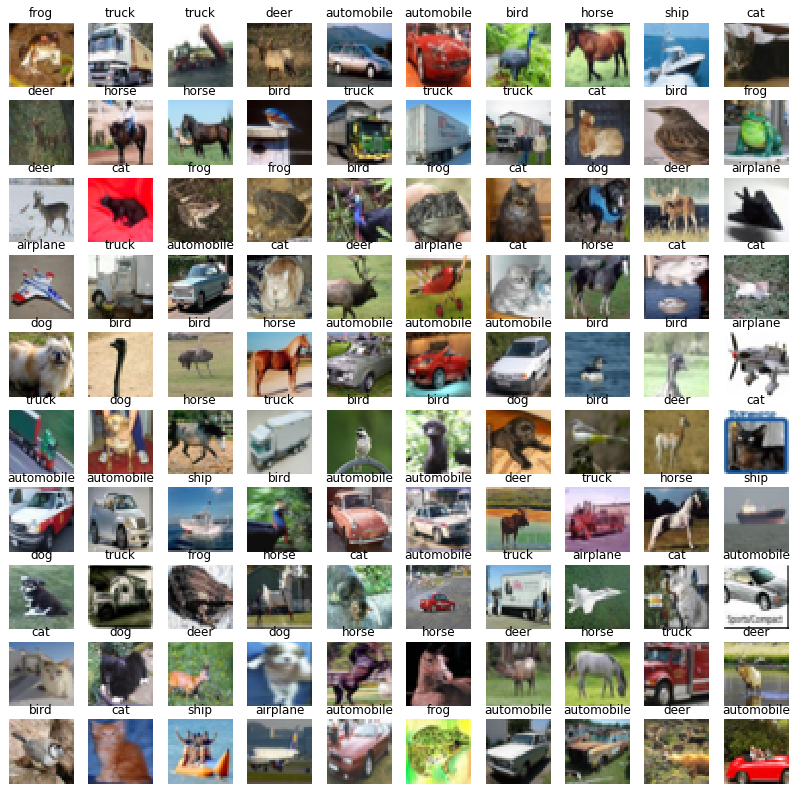

In [23]:
fig = plt.figure(figsize=(14,14))
for i in range(100):
  ax = plt.subplot(10,10,i+1)
  ax.imshow(X_train[i])
  ax.axis('off')
  ax.set_title(cifar_classes[y_train[i,0]])

In [24]:
inputs = layers.Input((32,32,3))
x = inputs

for ch in [64, 128, 256]:
    for i in range(3):
        x = layers.Conv2D(ch, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)
        x = layers.ReLU()(x)
    if ch != 256:
        x = layers.AveragePooling2D()(x)
        
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(10, activation="softmax")(x)
model = tf.keras.models.Model(inputs, x)
model.summary()


Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_38 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
re_lu_38 (ReLU)              (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_39 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
re_lu_39 (ReLU)              (None, 32, 32, 64)        0  

In [25]:
import numpy as np

rand_X = np.random.randn(16,32,32,3)
rand_y =  model.predict(rand_X)
print(rand_y.shape)

(16, 10)


In [26]:
print(np.sum(rand_y,axis=-1))

[1.         1.0000001  0.99999994 1.         1.         1.
 1.0000001  1.         1.0000001  1.         1.         1.
 0.9999999  1.         1.         0.99999994]


In [27]:
X_train = X_train.astype(np.float32)/255.0
X_test = X_test.astype(np.float32)/255.0
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

In [28]:
model.compile('adam', 'sparse_categorical_crossentropy',['sparse_categorical_crossentropy'])

In [29]:
print(model)

In [30]:
model.fit(X_train,y_train, validation_data=(X_test, y_test),epochs=50)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
17152/50000 [=========>....................] - ETA: 8:01 - loss: 1.6552 - sparse_categorical_crossentropy: 1.6552

KeyboardInterrupt: 

In [ ]:
fig = plt.figure(figsize=(14,14))
y_pred = np.argmax(model.predict(X_test), axis=-1) # argmaxで予測ラベル

for i in range(100):
    ax = fig.add_subplot(10, 10, i+1)
    ax.imshow(X_test[i])
    ax.axis("off")
    if y_pred[i] == y_test[i,0]:
        ax.set_title(cifar_classes[y_pred[i]])
    else:
        ax.set_title(cifar_classes[y_pred[i]]+" / "+cifar_classes[int(y_test[i,0])], color="red")   